<a href="https://colab.research.google.com/github/pritiyadav888/Leadership_Data/blob/main/leadership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive (I stored data in Google Drive and in github repo, It can be obtained from this official [link](https://data.world/adamhelsinger/globe-project) )

## Github data [link](https://github.com/pritiyadav888/Leadership_Data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary libraries

In [ ]:
import gc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from google.colab import drive
import ipywidgets as widgets
from IPython.display import display
import xgboost as xgb
import joblib

# Load datasets (Change the path_to_location_on_your_system)

In [ ]:
# Load datasets
societal_culture_data = pd.read_csv('https://raw.githubusercontent.com/pritiyadav888/Leadership_Data/main/GLOBE-Phase-2-Aggregated-Societal-Culture-Data.csv')
leadership_data = pd.read_csv('https://raw.githubusercontent.com/pritiyadav888/Leadership_Data/main/GLOBE-Phase-2-Aggregated-Leadership-Data.csv')


In [ ]:
societal_culture_data.head()

,Country,Country Name,Uncertainty Avoidance Societal Practices,Future Orientation Societal Practices,Power Distance Societal Practices,Collectivism I Societal Practices (Institutional Collectivism),Humane Orientation Societal Practices,Performance Orientation Societal Practices,Collectivism II Societal Practices (In-group Collectivism),Gender Egalitarianism Societal Practices,Assertiveness Societal Practices,Uncertainty Avoidance Societal Values,Future Orientation Societal Values,Power Distance Societal Values,Collectivism I Societal Values (Institutional Collectivism),Human Orientation Societal Values,Performance Orientation Societal Values,Collectivism II Societal Values (In-group Collectivism),Gender Egalitarianism Societal Values,Assertiveness Societal Values,Country Cluster
0,2,England,4.65,4.28,5.15,4.27,3.72,4.08,4.08,3.67,4.15,4.11,5.06,2.80,4.31,5.43,5.90,5.55,5.17,3.70,Anglo
1,3,Costa Rica,3.82,3.60,4.74,3.93,4.39,4.12,5.32,3.56,3.75,4.58,5.20,2.58,5.18,4.99,5.90,6.08,4.64,4.05,Latin America
2,5,Italy,3.79,3.25,5.43,3.68,3.63,3.58,4.94,3.24,4.07,4.47,5.91,2.47,5.13,5.58,6.07,5.72,4.88,3.82,Latin Europe
3,6,India,4.15,4.19,5.47,4.38,4.57,4.25,5.92,2.90,3.73,4.73,5.60,2.64,4.71,5.28,6.05,5.32,4.51,4.76,Southern Asia
4,7,Namibia,4.20,3.49,5.29,4.13,3.96,3.67,4.52,3.88,3.91,5.13,6.12,2.86,4.38,5.40,6.40,6.07,4.25,3.91,Sub-Sahara Africa


In [ ]:
leadership_data.head()

,Country,Country Name,Performance Oriented,Autocratic,Modesty,Charismatic 3: Self-sacrifice,Team 1: Collaborative Team Orientation,Decisive,Diplomatic,Face-saver,Charismatic 1: Visionary,Humane-oriented,Integrity,"Bureaucratic, Originally Labeled _Procedural_",Administratively Competent,Self-centred,Autonomous,Status Conscious,Charismatic 2: Inspirational,Malevolent,Team 2: Team Integrator,"Internally Competitive, Originally Labeled _Conflict Inducer_",Participative,Charismatic/Value-based Global Leadership Dimension,Team-Oriented Global Leadership Dimension,Self-Protective Global Leadership Dimension,Participative Global Leadership Dimension,Humane-Oriented Global Leadership Dimension,Autonomous Global Leadership Dimension,Country Cluster
0,2,England,6.38,2.55,4.91,4.90,5.33,6.00,5.40,2.54,6.21,4.91,6.12,3.54,5.35,1.94,3.92,3.70,6.39,1.74,6.16,3.42,5.68,6.01,5.71,3.04,5.57,4.90,3.92,Anglo
1,3,Costa Rica,6.15,2.46,5.48,5.67,5.74,5.66,5.14,2.72,6.06,4.37,6.18,3.98,5.86,1.96,3.46,5.08,6.10,1.71,6.05,4.17,5.53,5.95,5.81,3.55,5.54,4.99,3.46,Latin America
2,5,Italy,6.18,2.64,4.67,5.20,5.53,6.09,5.70,2.60,6.24,4.04,6.06,3.61,5.69,2.01,3.62,4.47,6.14,1.75,6.14,3.67,5.57,5.98,5.87,3.25,5.47,4.38,3.62,Latin Europe
3,6,India,5.96,3.10,5.33,5.45,5.51,5.83,5.70,3.57,6.02,5.17,5.99,4.10,5.98,2.63,3.85,4.18,5.93,2.35,5.83,4.24,5.07,5.85,5.72,3.77,4.99,5.26,3.85,Southern Asia
4,7,Namibia,6.16,2.58,5.10,4.79,5.46,6.16,5.42,2.48,6.16,5.11,6.35,4.33,5.82,2.13,3.77,3.91,6.26,1.70,6.05,3.83,5.53,5.99,5.81,3.36,5.48,5.10,3.77,Sub-Sahara Africa


In [ ]:
leadership_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 30 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Country                                                        62 non-null     int64  
 1   Country Name                                                   62 non-null     object 
 2   Performance Oriented                                           62 non-null     float64
 3   Autocratic                                                     62 non-null     float64
 4   Modesty                                                        62 non-null     float64
 5   Charismatic 3: Self-sacrifice                                  62 non-null     float64
 6   Team 1: Collaborative Team Orientation                         62 non-null     float64
 7   Decisive                                                       6

In [ ]:
societal_culture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 21 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country                                                         62 non-null     int64  
 1   Country Name                                                    62 non-null     object 
 2   Uncertainty Avoidance Societal Practices                        62 non-null     float64
 3   Future Orientation Societal Practices                           62 non-null     float64
 4   Power Distance Societal Practices                               62 non-null     float64
 5   Collectivism I Societal Practices (Institutional Collectivism)  62 non-null     float64
 6   Humane Orientation Societal Practices                           62 non-null     float64
 7   Performance Orientation Societal Practices             

# Set display options

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data cleaning ('Country Name' is the common key)
# Handle missing values by filling with mean values

In [ ]:
# Data cleaning (assuming 'Country Name' is the common key)
combined_data = pd.merge(societal_culture_data, leadership_data, on='Country Name')

# Handle missing values
combined_data.fillna(combined_data.mean(), inplace=True)

<ipython-input-4-f4de1c076199>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_data.fillna(combined_data.mean(), inplace=True)


# Display the first few rows of the combined data

In [ ]:
combined_data.head()

,Country_x,Country Name,Uncertainty Avoidance Societal Practices,Future Orientation Societal Practices,Power Distance Societal Practices,Collectivism I Societal Practices (Institutional Collectivism),Humane Orientation Societal Practices,Performance Orientation Societal Practices,Collectivism II Societal Practices (In-group Collectivism),Gender Egalitarianism Societal Practices,Assertiveness Societal Practices,Uncertainty Avoidance Societal Values,Future Orientation Societal Values,Power Distance Societal Values,Collectivism I Societal Values (Institutional Collectivism),Human Orientation Societal Values,Performance Orientation Societal Values,Collectivism II Societal Values (In-group Collectivism),Gender Egalitarianism Societal Values,Assertiveness Societal Values,Country Cluster_x,Country_y,Performance Oriented,Autocratic,Modesty,Charismatic 3: Self-sacrifice,Team 1: Collaborative Team Orientation,Decisive,Diplomatic,Face-saver,Charismatic 1: Visionary,Humane-oriented,Integrity,"Bureaucratic, Originally Labeled _Procedural_",Administratively Competent,Self-centred,Autonomous,Status Conscious,Charismatic 2: Inspirational,Malevolent,Team 2: Team Integrator,"Internally Competitive, Originally Labeled _Conflict Inducer_",Participative,Charismatic/Value-based Global Leadership Dimension,Team-Oriented Global Leadership Dimension,Self-Protective Global Leadership Dimension,Participative Global Leadership Dimension,Humane-Oriented Global Leadership Dimension,Autonomous Global Leadership Dimension,Country Cluster_y
0,2,England,4.65,4.28,5.15,4.27,3.72,4.08,4.08,3.67,4.15,4.11,5.06,2.80,4.31,5.43,5.90,5.55,5.17,3.70,Anglo,2,6.38,2.55,4.91,4.90,5.33,6.00,5.40,2.54,6.21,4.91,6.12,3.54,5.35,1.94,3.92,3.70,6.39,1.74,6.16,3.42,5.68,6.01,5.71,3.04,5.57,4.90,3.92,Anglo
1,3,Costa Rica,3.82,3.60,4.74,3.93,4.39,4.12,5.32,3.56,3.75,4.58,5.20,2.58,5.18,4.99,5.90,6.08,4.64,4.05,Latin America,3,6.15,2.46,5.48,5.67,5.74,5.66,5.14,2.72,6.06,4.37,6.18,3.98,5.86,1.96,3.46,5.08,6.10,1.71,6.05,4.17,5.53,5.95,5.81,3.55,5.54,4.99,3.46,Latin America
2,5,Italy,3.79,3.25,5.43,3.68,3.63,3.58,4.94,3.24,4.07,4.47,5.91,2.47,5.13,5.58,6.07,5.72,4.88,3.82,Latin Europe,5,6.18,2.64,4.67,5.20,5.53,6.09,5.70,2.60,6.24,4.04,6.06,3.61,5.69,2.01,3.62,4.47,6.14,1.75,6.14,3.67,5.57,5.98,5.87,3.25,5.47,4.38,3.62,Latin Europe
3,6,India,4.15,4.19,5.47,4.38,4.57,4.25,5.92,2.90,3.73,4.73,5.60,2.64,4.71,5.28,6.05,5.32,4.51,4.76,Southern Asia,6,5.96,3.10,5.33,5.45,5.51,5.83,5.70,3.57,6.02,5.17,5.99,4.10,5.98,2.63,3.85,4.18,5.93,2.35,5.83,4.24,5.07,5.85,5.72,3.77,4.99,5.26,3.85,Southern Asia
4,7,Namibia,4.20,3.49,5.29,4.13,3.96,3.67,4.52,3.88,3.91,5.13,6.12,2.86,4.38,5.40,6.40,6.07,4.25,3.91,Sub-Sahara Africa,7,6.16,2.58,5.10,4.79,5.46,6.16,5.42,2.48,6.16,5.11,6.35,4.33,5.82,2.13,3.77,3.91,6.26,1.70,6.05,3.83,5.53,5.99,5.81,3.36,5.48,5.10,3.77,Sub-Sahara Africa


# Display information about the dataset

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 50 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country_x                                                       61 non-null     int64  
 1   Country Name                                                    61 non-null     object 
 2   Uncertainty Avoidance Societal Practices                        61 non-null     float64
 3   Future Orientation Societal Practices                           61 non-null     float64
 4   Power Distance Societal Practices                               61 non-null     float64
 5   Collectivism I Societal Practices (Institutional Collectivism)  61 non-null     float64
 6   Humane Orientation Societal Practices                           61 non-null     float64
 7   Performance Orientation Societal Practices             

# Get a statistical summary of the dataset

In [ ]:
# Get a statistical summary
summary = combined_data.describe()
print(summary)

       Country_x  Uncertainty Avoidance Societal Practices  \
count  61.000000                                 61.000000   
mean   43.770492                                  4.174754   
std    29.365736                                  0.601998   
min     2.000000                                  2.880000   
25%    19.000000                                  3.660000   
50%    38.000000                                  4.150000   
75%    65.000000                                  4.580000   
max    99.000000                                  5.370000   

       Future Orientation Societal Practices  \
count                              61.000000   
mean                                3.844590   
std                                 0.462888   
min                                 2.880000   
25%                                 3.490000   
50%                                 3.810000   
75%                                 4.150000   
max                                 5.070000   

       P

# Visualize the distribution of a variable
# Visualize a scatterplot between two variables

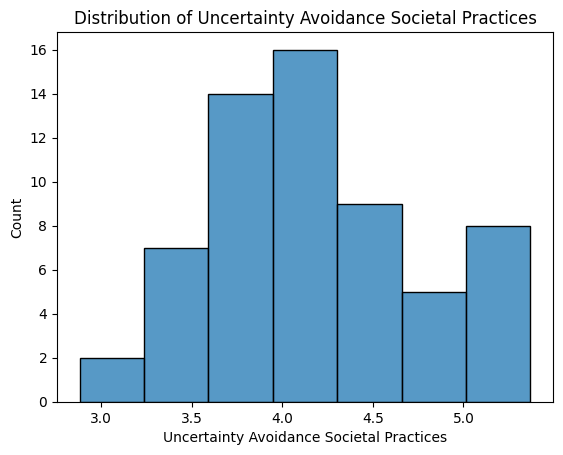

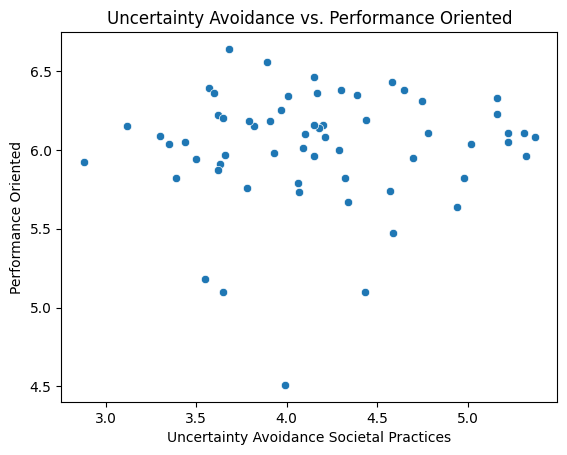

In [ ]:
# Visualization example
sns.histplot(combined_data['Uncertainty Avoidance Societal Practices'])
plt.title('Distribution of Uncertainty Avoidance Societal Practices')
plt.show()

sns.scatterplot(x='Uncertainty Avoidance Societal Practices', y='Performance Oriented', data=combined_data)
plt.title('Uncertainty Avoidance vs. Performance Oriented')
plt.show()

# Save processed data to a new CSV file

In [ ]:
# # Save processed data to a new file
# combined_data.to_csv('/content/drive/MyDrive/Colab Notebooks/datasets/leadership_data/processed_combined_data.csv', index=False)

# Perform garbage collection

In [ ]:
gc.collect()

3223

# Calculate the correlation coefficient between two variables
# Print the correlation coefficien

In [ ]:
# Calculate the correlation coefficient between two variables
correlation = combined_data['Uncertainty Avoidance Societal Practices'].corr(combined_data['Performance Oriented'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.05314380822593401


# Calculate the correlation matrix
## Perform hierarchical clustering to visualize correlations
## Create a color palette for the heatmap
## Create the heatmap
## Show the heatmap

<ipython-input-14-3579e2811836>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = combined_data.corr()


<Figure size 1500x1500 with 0 Axes>

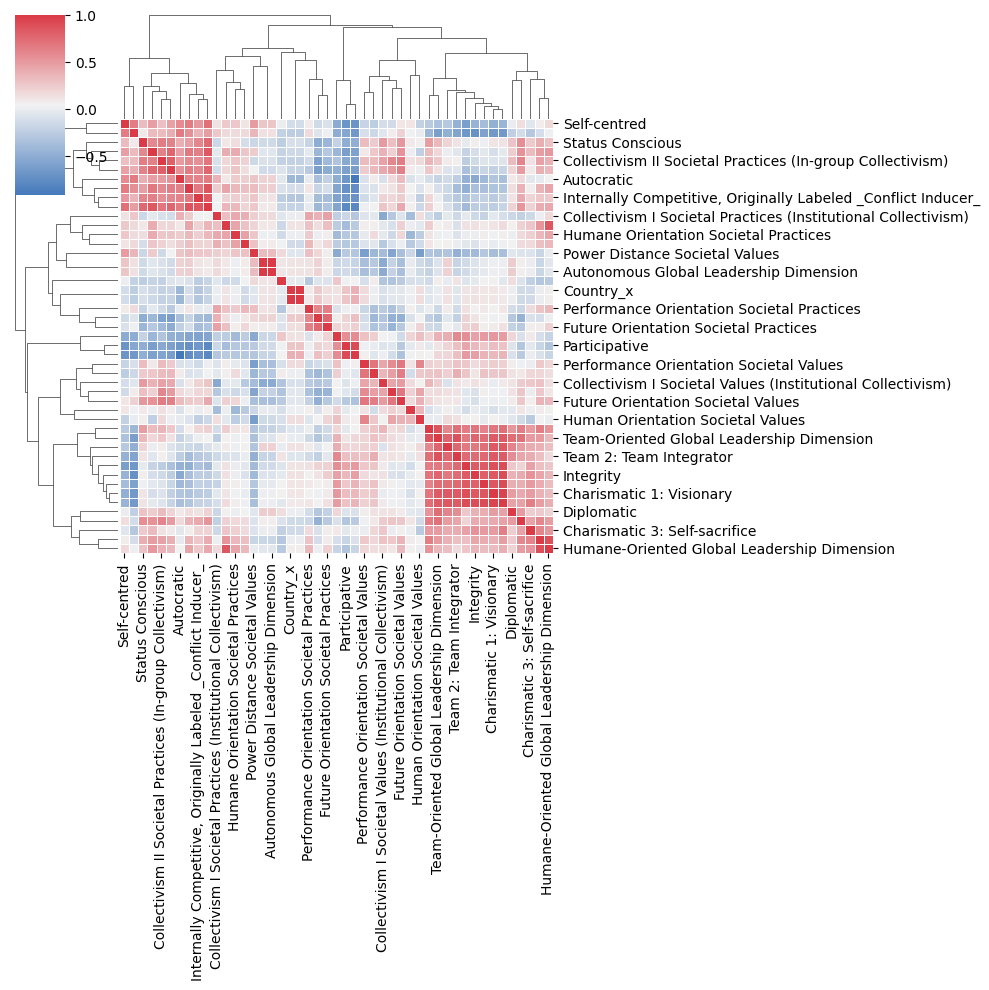

In [ ]:
# Calculate the correlation matrix
corr = combined_data.corr()

# Perform hierarchical clustering
hc = hierarchy.linkage(corr, method='average')

# Create a color palette with a specified number of colors
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Create the heatmap
plt.figure(figsize=(15, 15))
sns.clustermap(corr, row_linkage=hc, col_linkage=hc, cmap=cmap, linewidths=.5, annot=False)

# Show the plot
plt.show()

# Feature Engineering
# Create categorical bins for a variable

In [ ]:
# Feature Engineering
combined_data['Performance Orientation Score'] = combined_data[['Performance Orientation Societal Practices', 'Performance Orientation Societal Values']].mean(axis=1)
combined_data.drop(columns=['Performance Orientation Societal Practices', 'Performance Orientation Societal Values'], inplace=True)

# Categorical Bins
combined_data['Performance Orientation Category'] = pd.qcut(combined_data['Performance Orientation Score'], q=3, labels=['Low', 'Medium', 'High'])

# Perform one-hot encoding for categorical data
# Standardize numeric columns

In [ ]:
# One-Hot Encoding for categorical data
combined_data = pd.get_dummies(combined_data, columns=['Country Cluster_x', 'Country Cluster_y'], drop_first=True)

# Standardization
scaler = StandardScaler()
numeric_columns = combined_data.select_dtypes(include=[np.number]).columns.tolist()
combined_data[numeric_columns] = scaler.fit_transform(combined_data[numeric_columns])

# Display the names of features before PCA

In [ ]:
# Feature names before PCA
print("Feature names before PCA transformation:")
print(numeric_columns)  # Assuming 'numeric_columns' contains the names of the features used in PCA


Feature names before PCA transformation:
['Country_x', 'Uncertainty Avoidance Societal Practices', 'Future Orientation Societal Practices', 'Power Distance Societal Practices', 'Collectivism I Societal Practices (Institutional Collectivism)', 'Humane Orientation Societal Practices', 'Collectivism II Societal Practices (In-group Collectivism)', 'Gender Egalitarianism Societal Practices', 'Assertiveness Societal Practices ', 'Uncertainty Avoidance Societal Values', 'Future Orientation Societal Values', 'Power Distance Societal Values', 'Collectivism I Societal Values (Institutional Collectivism)', 'Human Orientation Societal Values', 'Collectivism II Societal Values (In-group Collectivism)', 'Gender Egalitarianism Societal Values', 'Assertiveness Societal Values', 'Country_y', 'Performance Oriented', 'Autocratic', 'Modesty', 'Charismatic 3: Self-sacrifice', 'Team 1: Collaborative Team Orientation', 'Decisive', 'Diplomatic', 'Face-saver', 'Charismatic 1: Visionary', 'Humane-oriented', 'In

# Perform Dimensionality Reduction using PCA

In [ ]:
# Dimensionality Reduction
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(combined_data[numeric_columns])
principal_df = pd.DataFrame(data=principal_components)

# Save the scaler and PCA models to disk or github

#Find the saved models on these links


[scaler.pkl
](https://github.com/pritiyadav888/Leadership_Data/blob/main/scaler.pkl)

[pca_model.pkl
](https://github.com/pritiyadav888/Leadership_Data/blob/main/pca_model.pkl)


In [ ]:
# Save the scaler and PCA to disk
# joblib.dump(scaler, '/content/drive/MyDrive/Colab Notebooks/datasets/leadership_data/scaler.pkl') #saved in github repo and in drive
# joblib.dump(pca, '/content/drive/MyDrive/Colab Notebooks/datasets/leadership_data/pca_model.pkl')  #saved in github repo and in drive

['/content/drive/MyDrive/Colab Notebooks/datasets/leadership_data/pca_model.pkl']

# Display the first few rows of the transformed data

In [ ]:
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-2.966705,1.215343,-0.624464,0.173154,-1.031163,-0.209339,1.193052,0.440308,0.613801,0.175408,-0.411791,0.597527,-0.046002,1.727524,1.701884,-0.738963,-0.212024,0.482600,0.437277,-0.224075,-0.116608,0.404056
1,-0.563361,-2.569897,1.735236,-0.433851,-1.883376,3.187985,0.955106,0.739383,-1.125240,-0.458801,-1.466185,0.756512,-0.180952,0.063129,0.541143,1.275488,-0.978717,-0.616061,-0.808132,-1.056749,0.260206,-0.249322
2,-1.869765,-0.506679,3.542954,0.917944,-1.905864,-1.057881,1.496262,-2.729932,2.016746,-1.193458,1.115264,0.273981,-0.035717,-0.242649,0.056103,-0.387062,0.001292,-0.288338,0.016923,-0.536394,-0.257569,0.333561
3,3.124268,-2.173238,-2.879011,-1.325448,-0.796445,-0.189219,-0.398480,-2.866841,0.605769,0.326386,-1.228400,0.925900,-1.615269,-0.857692,2.316338,-0.526875,0.320686,-0.941590,0.479190,-0.678224,0.800829,0.608516
4,-0.585198,-1.684770,-0.042420,-1.069016,-1.198806,-1.392508,-0.411705,3.722893,3.657407,-0.918249,-0.633183,1.686155,-1.107946,0.399750,-0.385811,-0.358346,-0.004846,1.630800,0.161027,-0.245100,-0.925125,-0.155796


# Preparing Data for Model

In [ ]:
# Preparing Data for Model
X = principal_df
y = combined_data['Performance Orientation Category'].astype('category').cat.codes

# Data Augmentation using SMOTE

In [ ]:
# Data Augmentation
smote = SMOTE()
X_res, y_res = smote.fit_resample(X.values, y)

# Combine augmented data for display
# Display the first few rows of the augmented data

In [ ]:
# Combine augmented data for display
augmented_data = pd.DataFrame(X_res, columns=principal_df.columns)
augmented_data['Performance Orientation Category'] = y_res

# Display the first few rows of the augmented data
print(augmented_data.head())

          0         1         2         3         4         5         6  \
0 -2.966705  1.215343 -0.624464  0.173154 -1.031163 -0.209339  1.193052   
1 -0.563361 -2.569897  1.735236 -0.433851 -1.883376  3.187985  0.955106   
2 -1.869765 -0.506679  3.542954  0.917944 -1.905864 -1.057881  1.496262   
3  3.124268 -2.173238 -2.879011 -1.325448 -0.796445 -0.189219 -0.398480   
4 -0.585198 -1.684770 -0.042420 -1.069016 -1.198806 -1.392508 -0.411705   

          7         8         9        10        11        12        13  \
0  0.440308  0.613801  0.175408 -0.411791  0.597527 -0.046002  1.727524   
1  0.739383 -1.125240 -0.458801 -1.466185  0.756512 -0.180952  0.063129   
2 -2.729932  2.016746 -1.193458  1.115264  0.273981 -0.035717 -0.242649   
3 -2.866841  0.605769  0.326386 -1.228400  0.925900 -1.615269 -0.857692   
4  3.722893  3.657407 -0.918249 -0.633183  1.686155 -1.107946  0.399750   

         14        15        16        17        18        19        20  \
0  1.701884 -0.738963 -

# Splitting Data with Cross-Validation

In [ ]:
# Splitting Data with Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_res):
    X_train, X_test = X_res[train_index], X_res[test_index]
    y_train, y_test = y_res[train_index], y_res[test_index]

    # XGBoost Model
    model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

    model.fit(X_train, y_train)

    # Evaluate the model
    predictions = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

    print(f"ROC AUC: {roc_auc}")
    print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC: 0.6184755720470007
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.17      0.25      0.20         4
           2       1.00      0.29      0.44         7

    accuracy                           0.36        14
   macro avg       0.50      0.40      0.36        14
weighted avg       0.62      0.36      0.37        14



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC: 0.8555555555555556
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.75      0.60      0.67         5
           2       0.75      1.00      0.86         3

    accuracy                           0.77        13
   macro avg       0.77      0.80      0.77        13
weighted avg       0.77      0.77      0.76        13



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC: 0.46388888888888885
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.20      0.18         5
           2       0.33      0.67      0.44         3

    accuracy                           0.23        13
   macro avg       0.17      0.29      0.21        13
weighted avg       0.14      0.23      0.17        13



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC: 0.7935185185185185
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.40      0.50      0.44         4
           2       1.00      0.80      0.89         5

    accuracy                           0.62        13
   macro avg       0.63      0.60      0.61        13
weighted avg       0.66      0.62      0.63        13



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:25:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


ROC AUC: 0.6277777777777778
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.40      0.50      0.44         4
           2       0.33      0.50      0.40         4

    accuracy                           0.38        13
   macro avg       0.41      0.40      0.38        13
weighted avg       0.42      0.38      0.37        13



In [ ]:
print("\nEvaluating XGBoost Model")
print("-------------------------")
print("\nFeatures for Prediction (after PCA):")
print(X_test)  # Display the features used for prediction
predictions = model.predict(X_test)
print("Predictions:")
print(predictions)  # Display the raw predictions


Evaluating XGBoost Model
-------------------------

Features for Prediction (after PCA):
[[ 6.04966881e+00 -8.53965467e-01 -2.28523239e+00 -5.30107920e-01
  -2.99348458e-01 -9.45776896e-02  3.44049700e+00  3.64079764e-02
  -1.69207607e+00 -5.09761884e-01  6.68934288e-01 -6.37334867e-01
   3.62181792e-01 -1.10997417e+00 -8.78930653e-01 -7.79327178e-01
  -7.63934976e-02  2.20191035e+00  8.24843090e-01 -1.19934935e+00
   3.83510834e-01  3.09887769e-01]
 [-2.08598296e+00 -7.09959224e+00  1.41949071e+00 -6.13960834e-01
  -7.96397419e-01  2.12051236e+00  9.35215696e-01  2.31579251e-01
  -1.24766379e+00 -4.75571184e-01  4.47409916e-01  5.78965999e-01
  -7.54873765e-01  5.54752372e-01  1.68526495e-01  5.22783335e-01
  -6.74760202e-01 -6.98065041e-01 -9.62670922e-01 -3.88944028e-01
  -2.91715331e-01 -9.41933956e-02]
 [-7.07976441e-01 -1.10570662e+00  3.07062181e+00  3.57822064e+00
   8.86185172e-01 -1.61505016e+00  7.26974415e-02  1.58415692e+00
   6.85213153e-01  2.43518201e-01 -5.24331171e-0

# Original categories mapping

In [ ]:
categories_mapping = dict(enumerate(combined_data['Performance Orientation Category'].cat.categories))
print("Label Mapping:", categories_mapping)


Label Mapping: {0: 'Low', 1: 'Medium', 2: 'High'}


# Save the XGBoost model

## Find the saved leaderaize_model.json on this [link](https://github.com/pritiyadav888/Leadership_Data/blob/main/leaderaize_model.json)  

In [ ]:
# model.save_model('/content/drive/MyDrive/Colab Notebooks/datasets/leadership_data/leaderaize_model.json')

# Demo the model results
## Load XGBoost model
## Function to make predictions
## Function to process prediction results
## Display the input widgets
## Predict

In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/datasets/leadership_data/leaderaize_model.json'
model = xgb.XGBClassifier()
model.load_model(model_path)

def make_prediction(b):
    # Get the values from the input widgets
    try:
        feature_values = [float(widget.value) for widget in input_feature_widgets]
        features = np.array([feature_values])

        # Make prediction using the model
        prediction = model.predict(features)

        # Process the prediction to a more readable format
        processed_prediction, label = process_prediction(prediction)

        # Display the input features and prediction
        print("Input Features:", feature_values)
        print("Predicted Performance Orientation Category:", label)
    except Exception as e:
        print("An error occurred while making a prediction:", e)

def process_prediction(prediction):
    # Check if the prediction is a 1D array
    if prediction.ndim == 1:
        class_label_index = np.argmax(prediction)
    else:
        class_label_index = np.argmax(prediction, axis=1)
    labels = ['Low', 'Medium', 'High']
    label = labels[class_label_index]
    return prediction, label

feature_names = [
    "Customer Satisfaction Score",
    "Revenue Growth Rate",
    "Employee Engagement Index",
    "Market Share Percentage",
    "Product Quality Index",
    "Advertising Expenditure",
    "Employee Turnover Rate",
    "Inventory Turnover Rate",
    "Customer Retention Rate",
    "Operating Margin",
    "Net Promoter Score",
    "Customer Acquisition Cost",
    "Employee Productivity Index",
    "Research and Development Investment",
    "Customer Lifetime Value",
    "Brand Recognition Score",
    "Supplier Relationship Index",
    "Sales Growth Rate",
    "Production Efficiency",
    "Market Expansion Index",
    "Cost of Goods Sold",
    "Inventory Holding Cost"
]

# Define the number of input features model expects
number_of_features = len(feature_names)

input_feature_widgets = [widgets.FloatText(description=name, style={'description_width': 'initial'}) for name in feature_names]

# Create a space widget for spacing
space_widget = widgets.HTML("&emsp;")

# Display the input widgets with spacing
for widget in input_feature_widgets:
    display(widget)
    display(space_widget)

# Button to trigger prediction
predict_button = widgets.Button(description="Predict", style={'button_color': 'lightcoral'})
predict_button.on_click(make_prediction)
display(space_widget)
display(space_widget)
display(predict_button)


FloatText(value=0.0, description='Customer Satisfaction Score', style=DescriptionStyle(description_width='init…

HTML(value='&emsp;')

FloatText(value=0.0, description='Revenue Growth Rate', style=DescriptionStyle(description_width='initial'))

HTML(value='&emsp;')

FloatText(value=0.0, description='Employee Engagement Index', style=DescriptionStyle(description_width='initia…

HTML(value='&emsp;')

FloatText(value=0.0, description='Market Share Percentage', style=DescriptionStyle(description_width='initial'…

HTML(value='&emsp;')

FloatText(value=0.0, description='Product Quality Index', style=DescriptionStyle(description_width='initial'))

HTML(value='&emsp;')

FloatText(value=0.0, description='Advertising Expenditure', style=DescriptionStyle(description_width='initial'…

HTML(value='&emsp;')

FloatText(value=0.0, description='Employee Turnover Rate', style=DescriptionStyle(description_width='initial')…

HTML(value='&emsp;')

FloatText(value=0.0, description='Inventory Turnover Rate', style=DescriptionStyle(description_width='initial'…

HTML(value='&emsp;')

FloatText(value=0.0, description='Customer Retention Rate', style=DescriptionStyle(description_width='initial'…

HTML(value='&emsp;')

FloatText(value=0.0, description='Operating Margin', style=DescriptionStyle(description_width='initial'))

HTML(value='&emsp;')

FloatText(value=0.0, description='Net Promoter Score', style=DescriptionStyle(description_width='initial'))

HTML(value='&emsp;')

FloatText(value=0.0, description='Customer Acquisition Cost', style=DescriptionStyle(description_width='initia…

HTML(value='&emsp;')

FloatText(value=0.0, description='Employee Productivity Index', style=DescriptionStyle(description_width='init…

HTML(value='&emsp;')

FloatText(value=0.0, description='Research and Development Investment', style=DescriptionStyle(description_wid…

HTML(value='&emsp;')

FloatText(value=0.0, description='Customer Lifetime Value', style=DescriptionStyle(description_width='initial'…

HTML(value='&emsp;')

FloatText(value=0.0, description='Brand Recognition Score', style=DescriptionStyle(description_width='initial'…

HTML(value='&emsp;')

FloatText(value=0.0, description='Supplier Relationship Index', style=DescriptionStyle(description_width='init…

HTML(value='&emsp;')

FloatText(value=0.0, description='Sales Growth Rate', style=DescriptionStyle(description_width='initial'))

HTML(value='&emsp;')

FloatText(value=0.0, description='Production Efficiency', style=DescriptionStyle(description_width='initial'))

HTML(value='&emsp;')

FloatText(value=0.0, description='Market Expansion Index', style=DescriptionStyle(description_width='initial')…

HTML(value='&emsp;')

FloatText(value=0.0, description='Cost of Goods Sold', style=DescriptionStyle(description_width='initial'))

HTML(value='&emsp;')

FloatText(value=0.0, description='Inventory Holding Cost', style=DescriptionStyle(description_width='initial')…

HTML(value='&emsp;')

HTML(value='&emsp;')

HTML(value='&emsp;')

Button(description='Predict', style=ButtonStyle(button_color='lightcoral'))

Input Features: [0.5, 0.5, 0.54, 0.6, 0.3, 0.9, 0.1, 0.2, 0.2, 0.5, 0.5, 0.7, 0.9, 0.9, 0.3, 0.4, 0.5, 0.6, -0.1, -0.2, 0.7, 0.6]
Predicted Performance Orientation Category: Low


Thank You For Watching